In [3]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [4]:
# import all from /raw_data/
# TODO concat all files in /raw_data/ into one dataframe
all_acc_csvs = glob.glob(os.getcwd() + "/raw_data/accelerometer/*.csv")
all_gyro_csvs = glob.glob(os.getcwd() + "/raw_data/gyroscope/*.csv")

df_acc = pd.concat([pd.read_csv(filename, index_col=None, header=0) 
            for filename in all_acc_csvs], axis=0, ignore_index=True)

df_gyro = pd.concat([pd.read_csv(filename, index_col=None, header=0) 
            for filename in all_gyro_csvs], axis=0, ignore_index=True)

In [5]:
# Cut off the readings when one sensor is started before the other
print(df_acc.shape, df_gyro.shape)

if df_acc.shape[0] > df_gyro.shape[0]:
    df_acc = df_acc.iloc[df_acc.shape[0] - df_gyro.shape[0]:, :]
else:
    df_gyro = df_gyro.iloc[df_gyro.shape[0] - df_acc.shape[0]:, :]

print(df_acc.shape, df_gyro.shape)

(659, 8) (561, 8)
(561, 8) (561, 8)


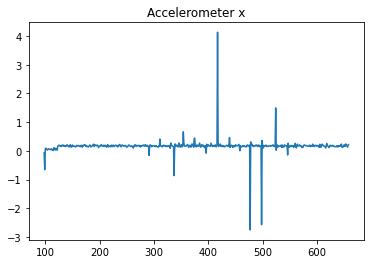

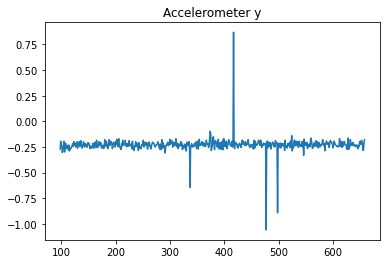

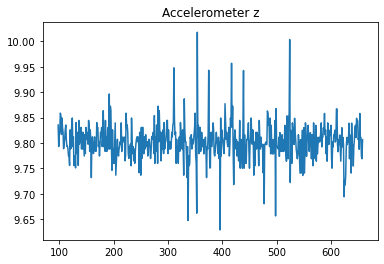

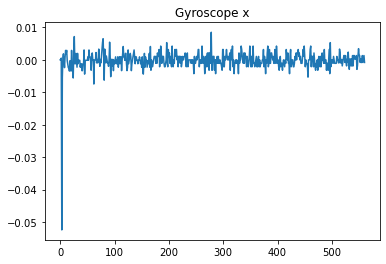

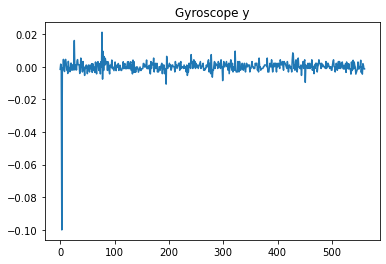

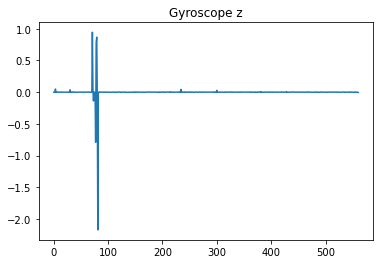

In [6]:
for df, name in zip([df_acc, df_gyro], ["Accelerometer", "Gyroscope"]):
    plt.plot(df["x"])
    plt.title(name + " x")
    plt.show()
    plt.plot(df["y"])
    plt.title(name + " y")
    plt.show()
    plt.plot(df["z"])
    plt.title(name + " z")
    plt.show()

In [7]:
current_payload = None
payload_change_indices = []
y_final_payload = []
print("Payload: ", end="")
for index, reading in enumerate(df_acc.values):
    if reading[6] != current_payload:
        current_payload = reading[6]
        added_symbol = str(current_payload[-1]) if str(current_payload) != 'nan' else None
        
        if added_symbol is not None:
            payload_change_indices.append(index)
            y_final_payload.append(added_symbol)
            print(added_symbol, end='')

print("\n", "# of readings:", len(df_acc.values))
print(" # of payload changes:", len(payload_change_indices))
print(" Payload change indices:", payload_change_indices)

Payload: oHello World!
 # of readings: 561
 # of payload changes: 13
 Payload change indices: [0, 194, 216, 235, 241, 258, 279, 324, 344, 365, 384, 405, 451]


In [8]:
important_indices = []
X_sequences = []
N_SURROUNDING = 10
for index in payload_change_indices:
    X_sequences.append(range(index - N_SURROUNDING , index + N_SURROUNDING))
    for i in range(index - N_SURROUNDING , index + N_SURROUNDING):
        if i >= 0 and i < len(df_acc.values) and i < len(df_gyro.values) and not (i in important_indices):
            important_indices.append(i)

print("# of relevant readings:", len(important_indices))
print(important_indices)

# of relevant readings: 231
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 395, 396, 397, 398, 399, 400, 401, 4

In [9]:
X = np.array(
    [np.hstack((df_acc.iloc[seq,[3,4,5]].values, df_gyro.iloc[seq,[3,4,5]].values)) for seq in X_sequences]
)
print("Sequence Rows:", X.shape)
y = np.array(y_final_payload).reshape(-1,1)
print("Payload:", y_final_payload)

Sequence Rows: (13, 20, 6)
Payload: ['o', 'H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', '!']


In [10]:
# normalize the data?
# transformations?
print(X)
print(y)

[[[ 1.66485757e-01 -1.96429238e-01  9.84362030e+00  1.33157941e-03
   -2.66315881e-04 -1.86421117e-03]
  [ 2.14395329e-01 -1.96429238e-01  9.80648994e+00 -7.98947643e-04
    7.98947643e-04  2.66315881e-04]
  [ 1.61694795e-01 -2.25174978e-01  9.81068230e+00  2.66315881e-04
    3.99473822e-03  1.33157941e-03]
  ...
  [ 5.86892255e-02 -1.94033757e-01  9.84901047e+00 -2.66315881e-04
   -7.98947643e-04  3.99473822e-03]
  [ 7.30620921e-02 -2.99434811e-01  9.83044529e+00 -2.39684293e-03
   -2.92947469e-03  2.92947469e-03]
  [ 6.34801835e-02 -2.61107147e-01  9.82086277e+00  7.98947643e-04
    3.46210646e-03 -2.66315881e-04]]

 [[ 1.62892535e-01 -2.22180635e-01  9.87236595e+00  0.00000000e+00
   -2.13052705e-03  1.33157941e-03]
  [ 1.67683497e-01 -2.31762543e-01  9.80229855e+00  4.26105410e-03
    0.00000000e+00 -7.98947643e-04]
  [ 2.20384032e-01 -2.74881154e-01  9.86338329e+00  2.13052705e-03
    1.06526352e-03  2.66315881e-04]
  ...
  [ 1.82655245e-01 -2.26971596e-01  9.84421921e+00  2.13052

In [11]:
# output to /processed_data/
np.save(os.getcwd() + "/processed_data/proc_X.npy", X)
np.save(os.getcwd() + "/processed_data/proc_y.npy", y)